In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns   

In [73]:
dataset = pd.read_csv('advertising.csv')

In [74]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [76]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [77]:
dataset.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

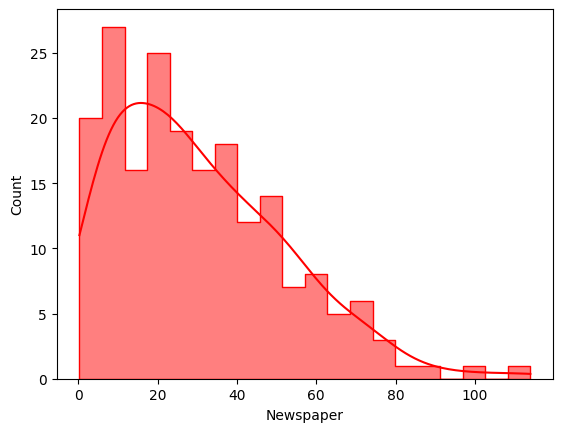

In [78]:
sns.histplot(dataset['Newspaper'], bins=20 , kde=True ,element='step', color='red')
plt.show()

In [79]:
dataset['Newspaper_log'] = np.sqrt(dataset['Newspaper'])
dataset['Newspaper_log'].skew()

np.float64(0.06238771883281062)

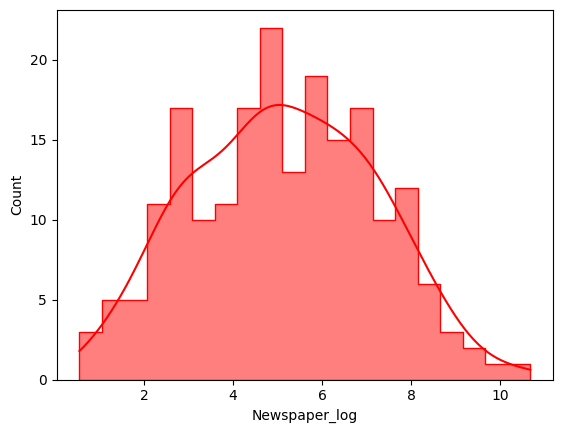

In [80]:
sns.histplot(dataset['Newspaper_log'], bins=20 , kde=True ,element='step', color='red')
plt.show()

In [81]:
dataset.corr()

,TV,Radio,Newspaper,Sales,Newspaper_log
TV,1.000000,0.054809,0.056648,0.901208,0.045976
Radio,0.054809,1.000000,0.354104,0.349631,0.313430
Newspaper,0.056648,0.354104,1.000000,0.157960,0.974100
Sales,0.901208,0.349631,0.157960,1.000000,0.139229
Newspaper_log,0.045976,0.313430,0.974100,0.139229,1.000000


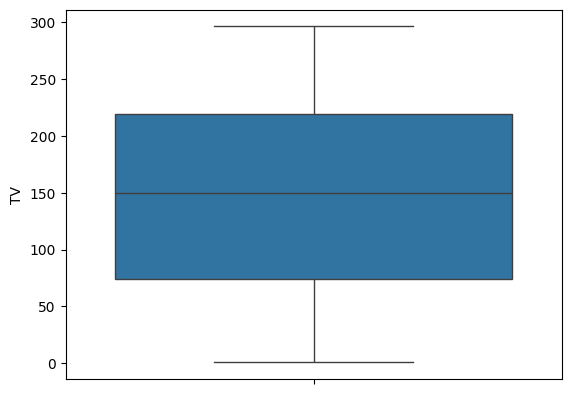

In [82]:
sns.boxplot(dataset['TV'])
plt.show()

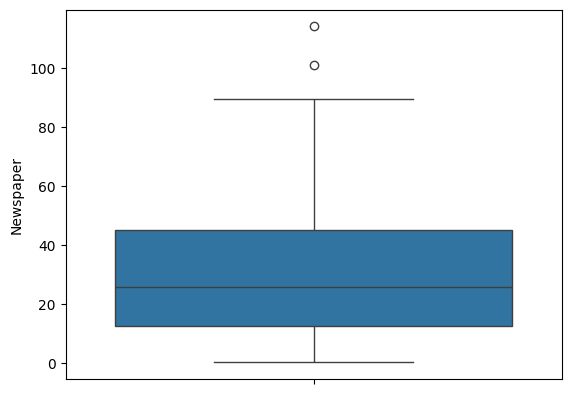

In [83]:
sns.boxplot(dataset['Newspaper'])
plt.show()

<Axes: ylabel='Radio'>

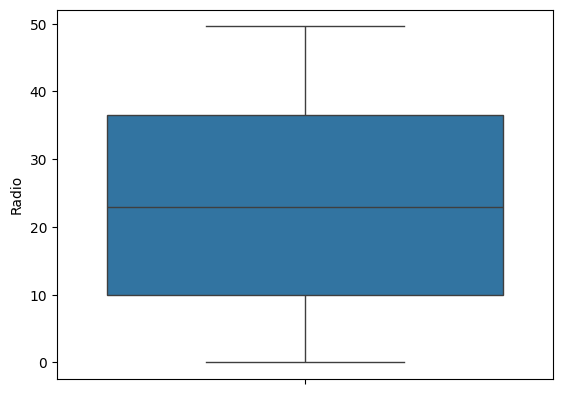

In [84]:
sns.boxplot(dataset['Radio'])

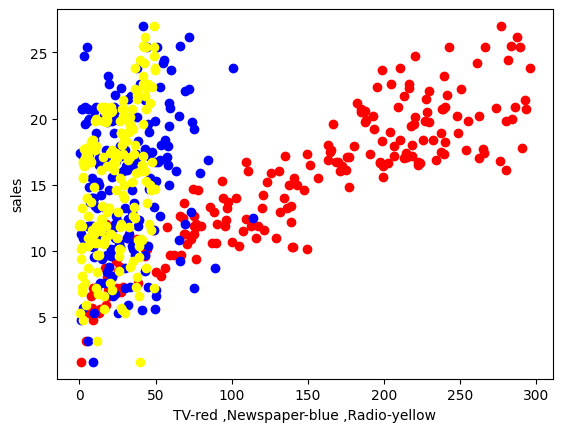

In [85]:
plt.scatter(dataset['TV'], dataset['Sales'], color='red')
plt.scatter(dataset['Newspaper'], dataset['Sales'], color='blue')
plt.scatter(dataset['Radio'], dataset['Sales'], color='yellow')

plt.xlabel('TV-red ,Newspaper-blue ,Radio-yellow')
plt.ylabel('sales')
plt.show()

In [86]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'Newspaper_log'], dtype='object')

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
X = dataset.drop(columns=['Sales' , 'Newspaper'] , axis=1).values
y = dataset['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test ,y_train , y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
linR_model = LinearRegression()
linR_model.fit(X_train ,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [94]:
y_linr_pred = linR_model.predict(X_test)
y_linr_pred

array([17.06091311, 20.43007877, 23.75641389,  9.29168101, 21.5910957 ,
       12.59093999, 21.09238897,  8.69231698, 17.23166149, 16.69060682,
        8.82215486,  8.50682391, 18.22575891,  8.02584801, 12.67113052,
       14.96494784,  8.14990238, 17.88804997, 11.03114083, 20.45410986,
       20.82231127, 12.55786686, 10.87229673, 22.40510074,  9.29779937,
        7.93841304, 20.8576978 , 13.78920017, 10.78930551,  7.82145423,
       15.97740268, 10.63345597, 20.82011689, 10.42211448, 21.61428782,
       21.12059681, 12.07562194, 22.83842665, 12.55185041,  6.47546995])

In [95]:
ridge_model = Ridge(alpha=1.0 , max_iter=500 )
ridge_model.fit(X_train , y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,500
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [96]:
y_ridge_pred = ridge_model.predict(X_test)

In [97]:
lasso_model  =Lasso(alpha=0.1 , max_iter=500)
lasso_model.fit(X_train , y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,500
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [98]:
y_lasso_pred = lasso_model.predict(X_test)

In [99]:
r2_linr = r2_score(y_test , y_linr_pred)
r2_linr

0.9049842195652702

In [100]:
r2_ridge = r2_score(y_test , y_ridge_pred)
r2_ridge

0.9048010645038317

In [101]:
r2_lasso = r2_score(y_test , y_lasso_pred)
r2_lasso

0.9046686056546178

In [102]:
lasso_model.coef_

array([4.49322183, 1.41552262, 0.03891659])

In [103]:
coeff_df = pd.DataFrame({
    'Feature' : ['TV' ,'Radio' ,'Newspaper'],
    'coeffiecients' : lasso_model.coef_
})
coeff_df

,Feature,coeffiecients
0,TV,4.493222
1,Radio,1.415523
2,Newspaper,0.038917
